### r: Erosion and Precipitation

In [2]:
# import libraries

import pandas as pd
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np
import math
import os
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap, Normalize

In [3]:
# settings
work_directory = r'C:\Users\...\Code'

os.chdir(work_directory)

# setting: font
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}
mpl.rc('font', **font)  # pass in the font dict as kwargs

In [4]:
# loading data # Check the "DataProcessFlow.xlsx" for detailed information on this data.

data_directory = 'Data/crn_basins_1.csv'
data0 = pd.read_table(data_directory, sep=',', header=0, index_col='OBSID1')

# discard samples with significant errors (bigger than Denudation)
data0['EBE_ERR-EBE_MMKYR'] = data0['EBE_ERR']-data0['EBE_MMKYR']
data0 = data0[data0['EBE_ERR-EBE_MMKYR']<0]
data0 = data0.drop(labels='EBE_ERR-EBE_MMKYR', axis='columns')

# restrict mean annual precipitation to less than its 90% percentile, which is 2242 mm
data0 = data0[data0['MAPrecip'] <= 2242]

# restrict sample materials to "sand" only
data0 = data0[data0['MATERIAL'].isin(['Sa', 'Sed'])]

# the timescale of 1-1,000 kyr corresponding to Denudation rates of 1-1000 mm/kyr
data0 = data0[1<=data0['EBE_MMKYR']]
data0 = data0[data0['EBE_MMKYR'] <= 1000]

# restrict catchments to NDVI>=0
data0 = data0[0 <= data0['NDVI']]

# convert Denudation rate to logarithmic form
data0['log_EBE_MMKYR'] = data0['EBE_MMKYR'].apply(math.log)

# convert slope's unit to degrees: math.degrees(math.atan(slope gradient/1000))
data0['SLP_deg'] = (data0['SLP_AVE'] / 1000).apply(math.atan).apply(math.degrees)


# data overview (1955 Be-10 samples are qualified)
data0
# data0['SLP_deg'].describe()
# data0.columns

,X_WGS84,Y_WGS84,AUTHOR,PUBYEAR,MATERIAL,SIZEMIN,SIZEMAX,PROJEPSGID,PROJECTION,AREA,...,ERRBE_AMS,ERRBE_MUON,ERRBE_PROD,ERRBE_TOT,EBE_MMKYR,EBE_ERR,NDVI,MAPrecip,log_EBE_MMKYR,SLP_deg
OBSID1,,,,,,,,,,,,,,,,,,,,,
S161WTS011,-78.40,-2.73,Vanacker,2015,Sa,250,1250,32717,WGS84_UTM_17S,710.00,...,0.00243,0.00151,0.00554,0.00623,113.64,23.52,0.629043,1276.731649,4.733036,25.096512
S096WTS014,6.86,44.78,Glotzbach,2013,Sa,250,500,32632,WGS84_UTM_32N,199.01,...,0.00944,0.00368,0.01945,0.02193,407.85,82.76,0.411857,1173.057927,6.010899,25.281366
S026WTS008,-77.79,40.89,Reuter,2005,Sa,250,500,32618,WGS84_UTM_18N,224.33,...,0.00012,0.00031,0.00072,0.00079,13.21,2.99,0.728435,1019.593660,2.580974,4.607509
S062WTS003,8.46,51.49,Meyer,2008,Sa,125,500,32632,WGS84_UTM_32N,77.02,...,0.00254,0.00122,0.00252,0.00378,48.49,14.25,0.764459,1106.197279,3.881358,5.232552
S009WTS029,4.71,49.90,Schaller,2001,Sa,500,1000,32632,WGS84_UTM_32N,9312.17,...,0.00047,0.00041,0.00090,0.00109,16.63,4.12,0.861457,881.210953,2.811208,0.982526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S132WTS002,145.64,-16.82,Nichols,2014,Sa,250,850,32755,WGS84_UTM_55S,7.82,...,0.00013,0.00052,0.00088,0.00103,15.51,3.89,0.922081,1855.200000,2.741485,6.482714
S162WTS002,146.52,-19.89,Croke,2015,Sa,125,1000,32755,WGS84_UTM_55S,5.12,...,0.00016,0.00040,0.00069,0.00081,11.89,3.06,0.138699,679.400000,2.475698,1.111399
S284WTS008,149.19,-35.43,Portenga,2016,Sa,250,850,32755,WGS84_UTM_55S,5.41,...,0.00008,0.00022,0.00061,0.00065,11.40,2.44,0.045681,771.142857,2.433613,5.710593


In [5]:
# functions

def get_correlation_coefficient(data,
                                slope_windowsize=10,
                                NDVI_range=[],
                                erosion_field='log_EBE_MMKYR',
                                slop_field='SLP_deg',
                                precipitation_field='MAPrecip',
                                NDVI_field='NDVI'):
    ## define some parameters
    r_corr = []
    Slope_window = []
    NDVI_window = []
    Number_samples = []
    P_value = []
    Precip_distribution = []
    i = 0

    slop_max = math.ceil(data[slop_field].max())    

    while i < (slop_max-slope_windowsize+1):
        
        ## control variables
        data_copy = data
        # slope window, moving step=10
        data_copy = data_copy[i <= data_copy[slop_field]]
        data_copy = data_copy[data_copy[slop_field] <= i+slope_windowsize]
        # vegetation cover (NDVI) window, moving step=0.1
        data_copy = data_copy[NDVI_range[0] <= data_copy[NDVI_field]]
        data_copy = data_copy[data_copy[NDVI_field] <= NDVI_range[1]]
        
        ## calculation
        # pearson r: precipitation and Denudation; and p-value
        r, p = stats.pearsonr(data_copy[erosion_field], data_copy[precipitation_field])
        r_corr.append(round(r, ndigits=4))
        P_value.append(p)
        
        ## recording r's corresponding 'slope window'
        Slope_tuple = [i, i+slope_windowsize]
        Slope_window.append(Slope_tuple)
        
        ## recording r's corresponding 'NDVI window'
        NDVI_window.append(NDVI_range)
        
        ## recording the volume of samples on each slope window
        Number_samples.append(data_copy.shape[0])

        ## recording precipitation distribution on each slope window
        Precip_distribution.append(data_copy[precipitation_field])
        
        ## moving slope window with moving step=10 degrees
        i = i+1
        
    ## generate a new data_copy frame
    df_r = pd.DataFrame({
        "r" : r_corr,
        "P" : P_value,
        "Number" : Number_samples,
        "Slope": Slope_window,
        "NDVI" : NDVI_window
    })

    # output the data within the NDVI window
    data_selected = data
    data_selected = data_selected[NDVI_range[0] <= data_selected[NDVI_field]]
    data_selected = data_selected[data_selected[NDVI_field] <= NDVI_range[1]]
    
    return df_r, data_selected, Precip_distribution

# define plotting function
def stem_plot_p_value(df_r,number=10):
    ## plotting, only for r with P-value < 0.05
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,2), dpi=100, constrained_layout=True)
    fig.patch.set_facecolor('white')
    ax.stem('r', linefmt='-', data=df_r[df_r['P'] < 0.05])
    ax.set_xticks([i for i in range(0, number)], labels=df_r[df_r['P'] < 0.05]['Slope'], rotation=90)
    ax.grid(True, linestyle='-.', axis='x', linewidth=0.5)
    return

def stem_plot(NDVI_range,df_r,data,sticks,transition_zone=10):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(8, 3), facecolor='white', dpi=100)
    # All r
    stem_all = ax.stem([i for i in range(0, 31)],'r', linefmt=(':'),  markerfmt=('o', 'grey'), data=df_r)
    # r with P-vale<0.05
    p_sticks = sticks
    stem_p_value = ax.stem(p_sticks, 'r', linefmt=('-'), label='r', markerfmt=('o'), data=df_r[df_r['P'] < 0.05])
    # add a vertical span
    ax.vlines(x=transition_zone, ymin=-1, ymax=1, color='grey', linestyles='dotted')
    ax.set_ylim(bottom=-0.4, top=0.5)
    ax.set_yticks([-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4])
    ax.set_xticks([i for i in range(0, 31)], labels=df_r['Slope'], rotation=90)
    ax.legend((stem_p_value, stem_all), ('P-value<0.05', 'P-value>0.05'), loc='lower right', shadow=True)
    ax.grid(True, linestyle=':', axis='x', linewidth=0.5)
    ax.annotate('{}<=NDVI<={};   N={};   Mean NDVI={};   Mean Precip={}mm'.format(NDVI_range[0], NDVI_range[1],data.shape[0], 
                                                                                round(data[['NDVI']].apply(np.mean).iloc[0], 2),
                                                                                int(data[['MAPrecip']].apply(np.mean).iloc[0])), (-1,0.45))
    return

### Slope window = 10 degrees, 0<=NDVI<=0.5

In [6]:
df_r1, data1, Precip_dis1 = get_correlation_coefficient(data0,
                                    slope_windowsize=10,
                                    NDVI_range=[0,0.5],
                                    erosion_field='log_EBE_MMKYR',
                                    slop_field='SLP_deg',
                                    precipitation_field='MAPrecip',
                                    NDVI_field='NDVI')
# df_r1
# data1

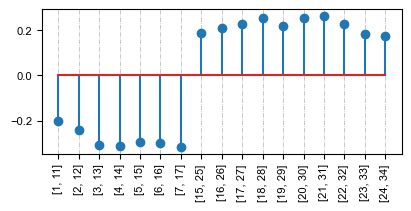

In [7]:
stem_plot_p_value(df_r=df_r1, number=17)

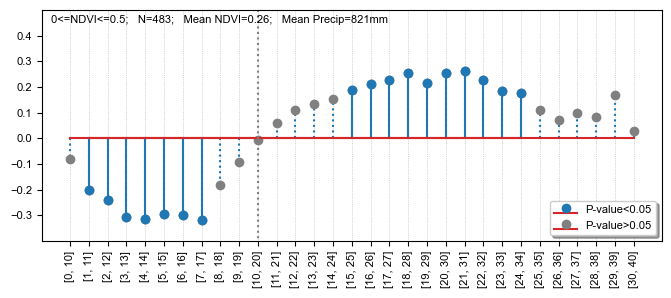

In [8]:
p_sticks=[i for i in range(1, 8)] +  [i for i in range(15, 25)]
stem_plot(NDVI_range=[0,0.5],df_r=df_r1,data=data1,sticks=p_sticks,transition_zone=10)

### Slope window = 10 degree, 0.1<=NDVI<=0.6

In [9]:
df_r2, data2, Precip_dis2 = get_correlation_coefficient(data0,
                                    slope_windowsize=10,
                                    NDVI_range=[0.1,0.6],
                                    erosion_field='log_EBE_MMKYR',
                                    slop_field='SLP_deg',
                                    precipitation_field='MAPrecip',
                                    NDVI_field='NDVI')

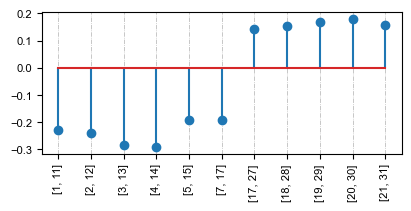

In [10]:
stem_plot_p_value(df_r=df_r2,number=11)

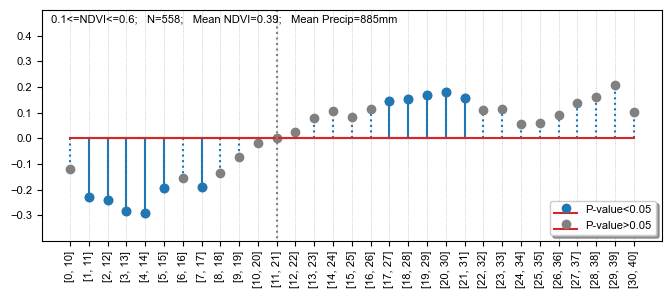

In [11]:
p_sticks=[i for i in range(1, 6)] + [7] + [i for i in range(17, 22)]
stem_plot(NDVI_range=[0.1,0.6],df_r=df_r2,data=data2,sticks=p_sticks,transition_zone=11)

### Slope window = 10 degree, 0.2<=NDVI<=0.7

In [12]:
df_r3, data3, Precip_dis3 = get_correlation_coefficient(data0,
                                    slope_windowsize=10,
                                    NDVI_range=[0.2,0.7],
                                    erosion_field='log_EBE_MMKYR',
                                    slop_field='SLP_deg',
                                    precipitation_field='MAPrecip',
                                    NDVI_field='NDVI')

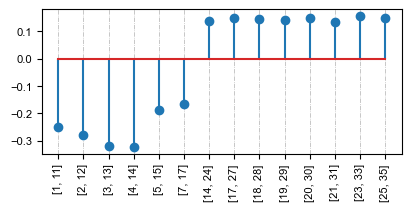

In [13]:
stem_plot_p_value(df_r=df_r3,number=14)

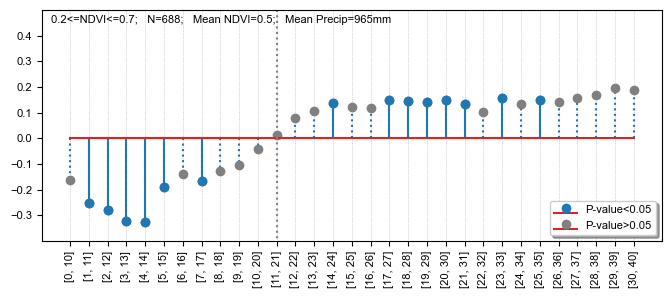

In [14]:
p_sticks=[i for i in range(1, 6)] + [7,14] + [i for i in range(17, 22)] + [23,25]
stem_plot(NDVI_range=[0.2,0.7],df_r=df_r3,data=data3,sticks=p_sticks,transition_zone=11)

### Slope window = 10 degree, 0.3<=NDVI<=0.8

In [15]:
df_r4, data4, Precip_dis4 = get_correlation_coefficient(data0,
                                    slope_windowsize=10,
                                    NDVI_range=[0.3,0.8],
                                    erosion_field='log_EBE_MMKYR',
                                    slop_field='SLP_deg',
                                    precipitation_field='MAPrecip',
                                    NDVI_field='NDVI')

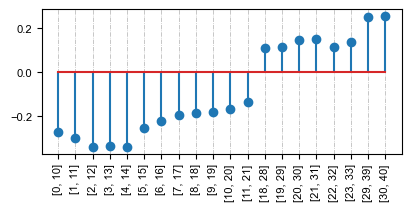

In [16]:
stem_plot_p_value(df_r=df_r4,number=20)

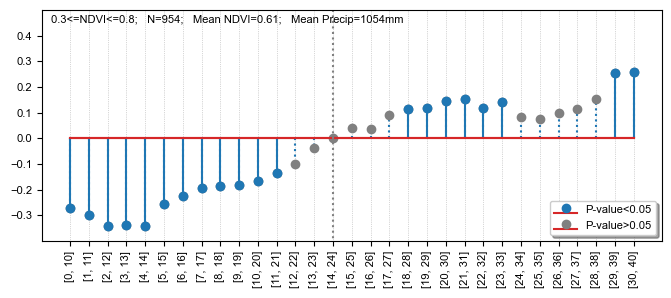

In [17]:
p_sticks=[i for i in range(0, 12)] + [i for i in range(18, 24)] + [29,30]
stem_plot(NDVI_range=[0.3,0.8],df_r=df_r4,data=data4,sticks=p_sticks,transition_zone=14)

### Slope window = 10 degree, 0.4<=NDVI<=0.9

In [18]:
df_r5, data5, Precip_dis5 = get_correlation_coefficient(data0,
                                    slope_windowsize=10,
                                    NDVI_range=[0.4,0.9],
                                    erosion_field='log_EBE_MMKYR',
                                    slop_field='SLP_deg',
                                    precipitation_field='MAPrecip',
                                    NDVI_field='NDVI')

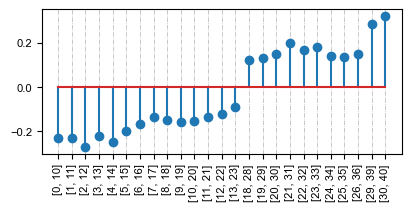

In [19]:
stem_plot_p_value(df_r=df_r5,number=25)

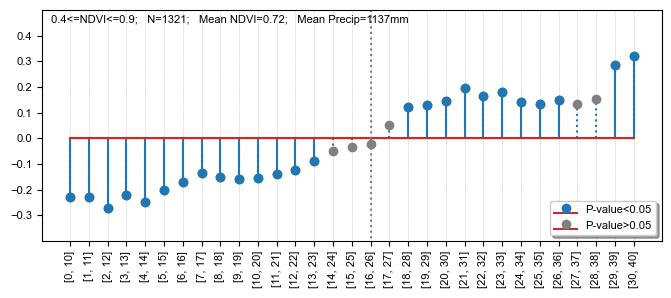

In [20]:
p_sticks = [i for i in range(0, 14)] + [i for i in range(18, 27)] + [29,30]
stem_plot(NDVI_range=[0.4,0.9],df_r=df_r5, data=data5, sticks=p_sticks,transition_zone=16)

### Slope window = 10 degree, 0.5<=NDVI

In [21]:
df_r6, data6, Precip_dis6 = get_correlation_coefficient(data0,
                                    slope_windowsize=10,
                                    NDVI_range=[0.5,1],
                                    erosion_field='log_EBE_MMKYR',
                                    slop_field='SLP_deg',
                                    precipitation_field='MAPrecip',
                                    NDVI_field='NDVI')

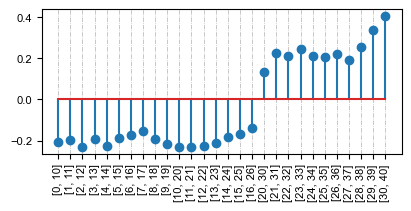

In [22]:
stem_plot_p_value(df_r=df_r6,number=28)

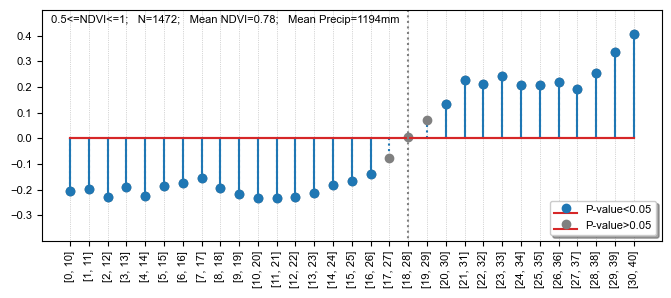

In [23]:
p_sticks = [i for i in range(0, 17)] + [i for i in range(20, 31)]
stem_plot(NDVI_range=[0.5,1],df_r=df_r6, data=data6, sticks=p_sticks,transition_zone=18)

### Slope window = 10 degree, 0.6<=NDVI

In [24]:
df_r7, data7, Precip_dis7 = get_correlation_coefficient(data0,
                                    slope_windowsize=10,
                                    NDVI_range=[0.6,1],
                                    erosion_field='log_EBE_MMKYR',
                                    slop_field='SLP_deg',
                                    precipitation_field='MAPrecip',
                                    NDVI_field='NDVI')

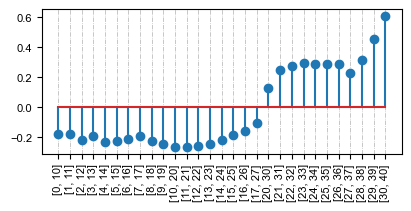

In [25]:
stem_plot_p_value(df_r=df_r7,number=29)

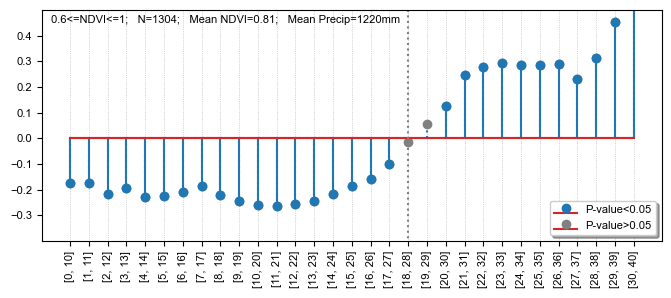

In [26]:
p_sticks = [i for i in range(0, 18)] + [i for i in range(20, 31)]
stem_plot(NDVI_range=[0.6,1],df_r=df_r7, data=data7, sticks=p_sticks,transition_zone=18)

### Slope window = 10 degree, 0.7<=NDVI

In [27]:
df_r8, data8, Precip_dis8 = get_correlation_coefficient(data0,
                                    slope_windowsize=10,
                                    NDVI_range=[0.7,1],
                                    erosion_field='log_EBE_MMKYR',
                                    slop_field='SLP_deg',
                                    precipitation_field='MAPrecip',
                                    NDVI_field='NDVI')

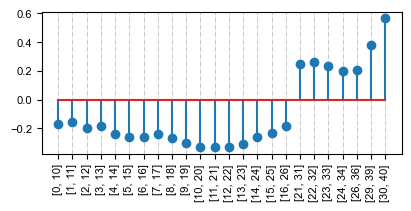

In [28]:
stem_plot_p_value(df_r=df_r8,number=24)

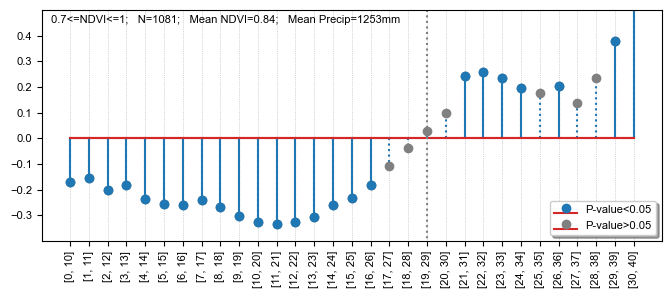

In [29]:
p_sticks = [i for i in range(0, 17)] + [i for i in range(21, 25)] + [26,29,30]
stem_plot(NDVI_range=[0.7,1],df_r=df_r8, data=data8, sticks=p_sticks,transition_zone=19)

#### Figure 1

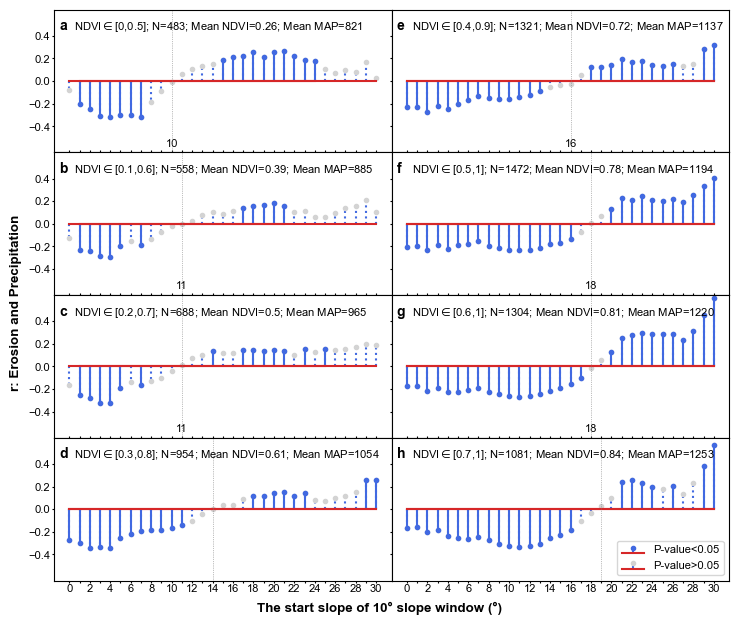

In [45]:
fig, axs = plt.subplots(nrows=4, ncols=2, sharex=False, sharey=True, figsize=(7.7, 6.5), facecolor='white', dpi=100)
fig.tight_layout(pad=2.5)
fig.subplots_adjust(wspace=0, hspace=0)
# fig.suptitle('NDVI window=0.5; Slope windows=10°')
fig.supxlabel('The start slope of 10° slope window (°)', fontweight='bold', y=0.02)
fig.supylabel('r: Erosion and Precipitation', fontweight='bold')
# setting: font
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}
mpl.rc('font', **font)  # pass in the font dict as kwargs

ax00 = axs[0,0]
ax10 = axs[1,0]
ax20 = axs[2,0]
ax30 = axs[3,0]
ax01 = axs[0,1]
ax11 = axs[1,1]
ax21 = axs[2,1]
ax31 = axs[3,1]

p_sticks = [i for i in range(1, 8)] +  [i for i in range(15, 25)]
ax00.stem([i for i in range(0, 31)],'r', linefmt=(':', 'royalblue'),  markerfmt=('.', 'lightgrey'), data=df_r1)
ax00.stem(p_sticks, 'r', linefmt=('-', 'royalblue'), label='r', markerfmt=('.', 'royalblue'), data=df_r1[df_r1['P'] < 0.05])
ax00.vlines(x=10, ymin=-1, ymax=1, color='grey', linestyles='dotted', linewidth=0.5)
ax00.set_ylim(bottom=-0.63, top=0.63)
ax00.set_yticks([-0.4,-0.2,0.0,0.2,0.4])
ax00.set_xticks([i for i in range(0, 31)], labels=['','','','','','','','','','',10,'','','','','','','','','','','','','','','','','','','',''])
ax00.tick_params(axis='y', length=1.5, pad=1)
ax00.tick_params(axis='x', direction='in', length=1.5, pad=-10)
ax00.annotate('NDVI'+ r'$\in$' + '[0,0.5]; N={}; Mean NDVI={}; Mean MAP={}'.format(data1.shape[0], round(data1[['NDVI']].apply(np.mean).iloc[0], 2),int(data1[['MAPrecip']].apply(np.mean).iloc[0])), (0.5,0.45), fontsize=8)
ax00.annotate('a', (-1,0.45), fontweight='bold', fontsize=10)


p_sticks = [i for i in range(1, 6)] + [7] + [i for i in range(17, 22)]
ax10.stem([i for i in range(0, 31)],'r', linefmt=(':', 'royalblue'),  markerfmt=('.', 'lightgrey'), data=df_r2)
ax10.stem(p_sticks, 'r', linefmt=('-', 'royalblue'), label='r', markerfmt=('.', 'royalblue'), data=df_r2[df_r2['P'] < 0.05])
ax10.vlines(x=11, ymin=-1, ymax=1, color='grey', linestyles='dotted', linewidth=0.5)
ax10.set_ylim(bottom=-0.63, top=0.63)
ax10.set_yticks([-0.4,-0.2,0.0,0.2,0.4])
ax10.set_xticks([i for i in range(0, 31)], labels=['','','','','','','','','','','',11,'','','','','','','','','','','','','','','','','','',''])
ax10.tick_params(axis='y', length=1.5, pad=1)
ax10.tick_params(axis='x', direction='in', length=1.5, pad=-10)
ax10.annotate('NDVI'+ r'$\in$' + '[0.1,0.6]; N={}; Mean NDVI={}; Mean MAP={}'.format(data2.shape[0], round(data2[['NDVI']].apply(np.mean).iloc[0], 2),int(data2[['MAPrecip']].apply(np.mean).iloc[0])), (0.5,0.45), fontsize=8)
ax10.annotate('b', (-1,0.45), fontweight='bold', fontsize=10)

p_sticks = [i for i in range(1, 6)] + [7,14] + [i for i in range(17, 22)] + [23,25]
ax20.stem([i for i in range(0, 31)],'r', linefmt=(':', 'royalblue'),  markerfmt=('.', 'lightgrey'), data=df_r3)
ax20.stem(p_sticks, 'r', linefmt=('-', 'royalblue'), label='r', markerfmt=('.', 'royalblue'), data=df_r3[df_r3['P'] < 0.05])
ax20.vlines(x=11, ymin=-1, ymax=1, color='grey', linestyles='dotted', linewidth=0.5)
ax20.set_ylim(bottom=-0.63, top=0.63)
ax20.set_yticks([-0.4,-0.2,0.0,0.2,0.4])
ax20.set_xticks([i for i in range(0, 31)], labels=['','','','','','','','','','','',11,'','','','','','','','','','','','','','','','','','',''])
ax20.tick_params(axis='y', length=1.5, pad=1)
ax20.tick_params(axis='x', direction='in', length=1.5, pad=-10)
ax20.annotate('NDVI'+ r'$\in$' + '[0.2,0.7]; N={}; Mean NDVI={}; Mean MAP={}'.format(data3.shape[0], round(data3[['NDVI']].apply(np.mean).iloc[0], 2),int(data3[['MAPrecip']].apply(np.mean).iloc[0])), (0.5,0.45), fontsize=8)
ax20.annotate('c', (-1,0.45), fontweight='bold', fontsize=10)

p_sticks = [i for i in range(0, 12)] + [i for i in range(18, 24)] + [29,30]
ax30.stem([i for i in range(0, 31)],'r', linefmt=(':', 'royalblue'),  markerfmt=('.', 'lightgrey'), data=df_r4)
ax30.stem(p_sticks, 'r', linefmt=('-', 'royalblue'), label='r', markerfmt=('.', 'royalblue'), data=df_r4[df_r4['P'] < 0.05])
ax30.vlines(x=14, ymin=-1, ymax=1, color='grey', linestyles='dotted', linewidth=0.5)
ax30.set_ylim(bottom=-0.63, top=0.63)
ax30.set_yticks([-0.4,-0.2,0.0,0.2,0.4])
ax30.set_xticks([i for i in range(0, 31)], labels=[0,'',2,'',4,'',6,'',8,'',10,'',12,'',14,'',16,'',18,'',20,'',22,'',24,'',26,'',28,'',30])
ax30.tick_params(length=1.5, pad=1)
ax30.tick_params(axis='x', direction='out', length=1.5, pad=1)
ax30.annotate('NDVI'+ r'$\in$' + '[0.3,0.8]; N={}; Mean NDVI={}; Mean MAP={}'.format(data4.shape[0], round(data4[['NDVI']].apply(np.mean).iloc[0], 2),int(data4[['MAPrecip']].apply(np.mean).iloc[0])), (0.5,0.45), fontsize=8)
ax30.annotate('d', (-1,0.45), fontweight='bold', fontsize=10)

p_sticks = [i for i in range(0, 14)] + [i for i in range(18, 27)] + [29,30]
ax01.stem([i for i in range(0, 31)],'r', linefmt=(':', 'royalblue'),  markerfmt=('.', 'lightgrey'), data=df_r5)
ax01.stem(p_sticks, 'r', linefmt=('-', 'royalblue'), label='r', markerfmt=('.', 'royalblue'), data=df_r5[df_r5['P'] < 0.05])
ax01.vlines(x=16, ymin=-1, ymax=1, color='grey', linestyles='dotted', linewidth=0.5)
ax01.set_xticks([i for i in range(0, 31)], labels=['','','','','','','','','','','','','','','','',16,'','','','','','','','','','','','','',''])
ax01.set_ylim(bottom=-0.63, top=0.63)
ax01.set_yticks([-0.4,-0.2,0.0,0.2,0.4])
ax01.tick_params(axis='y', length=1.5, pad=1)
ax01.tick_params(axis='x', direction='in', length=1.5, pad=-10)
ax01.annotate('NDVI'+ r'$\in$' + '[0.4,0.9]; N={}; Mean NDVI={}; Mean MAP={}'.format(data5.shape[0], round(data5[['NDVI']].apply(np.mean).iloc[0], 2),int(data5[['MAPrecip']].apply(np.mean).iloc[0])), (0.5,0.45), fontsize=8)
ax01.annotate('e', (-1,0.45), fontweight='bold', fontsize=10)

p_sticks = [i for i in range(0, 17)] + [i for i in range(20, 31)]
ax11.stem([i for i in range(0, 31)],'r', linefmt=(':', 'royalblue'),  markerfmt=('.', 'lightgrey'), data=df_r6)
ax11.stem(p_sticks, 'r', linefmt=('-', 'royalblue'), label='r', markerfmt=('.', 'royalblue'), data=df_r6[df_r6['P'] < 0.05])
ax11.vlines(x=18, ymin=-1, ymax=1, color='grey', linestyles='dotted', linewidth=0.5)
ax11.set_xticks([i for i in range(0, 31)], labels=['','','','','','','','','','','','','','','','','','',18,'','','','','','','','','','','',''])
ax11.tick_params(axis='y', length=1.5, pad=1)
ax11.tick_params(axis='x', direction='in', length=1.5, pad=-10)
ax11.annotate('NDVI'+ r'$\in$' + '[0.5,1]; N={}; Mean NDVI={}; Mean MAP={}'.format(data6.shape[0], round(data6[['NDVI']].apply(np.mean).iloc[0], 2),int(data6[['MAPrecip']].apply(np.mean).iloc[0])), (0.5,0.45), fontsize=8)
ax11.annotate('f', (-1,0.45), fontweight='bold', fontsize=10)

p_sticks = [i for i in range(0, 18)] + [i for i in range(20, 31)]
ax21.stem([i for i in range(0, 31)],'r', linefmt=(':', 'royalblue'),  markerfmt=('.', 'lightgrey'), data=df_r7)
ax21.stem(p_sticks, 'r', linefmt=('-', 'royalblue'), label='r', markerfmt=('.', 'royalblue'), data=df_r7[df_r7['P'] < 0.05])
ax21.vlines(x=18, ymin=-1, ymax=1, color='grey', linestyles='dotted', linewidth=0.5)
ax21.set_xticks([i for i in range(0, 31)], labels=['','','','','','','','','','','','','','','','','','',18,'','','','','','','','','','','',''])
ax21.tick_params(axis='y', length=1.5, pad=1)
ax21.tick_params(axis='x', direction='in', length=1.5, pad=-10)
ax21.annotate('NDVI'+ r'$\in$' + '[0.6,1]; N={}; Mean NDVI={}; Mean MAP={}'.format(data7.shape[0], round(data7[['NDVI']].apply(np.mean).iloc[0], 2),int(data7[['MAPrecip']].apply(np.mean).iloc[0])), (0.5,0.45), fontsize=8)
ax21.annotate('g', (-1,0.45), fontweight='bold', fontsize=10)

p_sticks = [i for i in range(0, 17)] + [i for i in range(21, 25)] + [26,29,30]
stem_all = ax31.stem([i for i in range(0, 31)],'r', linefmt=(':', 'royalblue'),  markerfmt=('.', 'lightgrey'), data=df_r8)
stem_p_value = ax31.stem(p_sticks, 'r', linefmt=('-', 'royalblue'), label='r', markerfmt=('.', 'royalblue'), data=df_r8[df_r8['P'] < 0.05])
ax31.vlines(x=19, ymin=-1, ymax=1, color='grey', linestyles='dotted', linewidth=0.5)
ax31.set_xticks([i for i in range(0, 31)], labels=[0,'',2,'',4,'',6,'',8,'',10,'',12,'',14,'',16,'',18,'',20,'',22,'',24,'',26,'',28,'',30])
ax31.tick_params(length=1.5, pad=1)
ax31.annotate('NDVI'+ r'$\in$' + '[0.7,1]; N={}; Mean NDVI={}; Mean MAP={}'.format(data8.shape[0], round(data8[['NDVI']].apply(np.mean).iloc[0], 2),int(data8[['MAPrecip']].apply(np.mean).iloc[0])), (0.5,0.45), fontsize=8)
ax31.annotate('h', (-1,0.45), fontweight='bold', fontsize=10)
ax31.legend((stem_p_value, stem_all), ('P-value<0.05', 'P-value>0.05'), loc='lower right', shadow=False, fontsize=8)

# plt.savefig("Results/240131/Figure1.svg", dpi=300, bbox_inches='tight')

#### figure S4

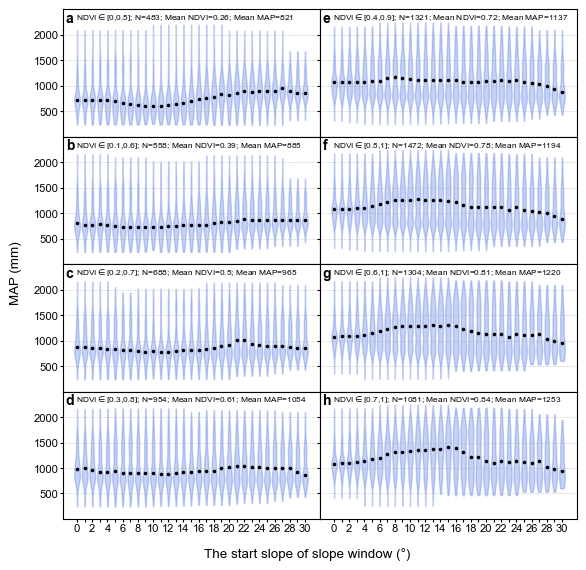

In [31]:
## define a function "Medians" to calculate the median of precipitation distribution
def medians(dis):
    medians=[]
    for n in range(0,31,1):
        medians.append(np.percentile(dis[n],[50])[0])
    return medians
fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True, figsize=(6.2, 6), dpi=100, facecolor='white')
fig.tight_layout(pad=3)
fig.subplots_adjust(wspace=0, hspace=0)
fig.supxlabel('The start slope of slope window (°)', y=0.02)
fig.supylabel('MAP (mm)')

# setting: font
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}
mpl.rc('font', **font)  # pass in the font dict as kwargs


### 0--0.5
vp1 = axs[0,0].violinplot(dataset=Precip_dis1, positions=[i for i in range(0, 31)], widths=0.75, showmeans=False, showextrema=False, showmedians=False, quantiles=None)
for color_set in vp1['bodies']:
    color_set.set_facecolor('royalblue')
    color_set.set_edgecolor("royalblue")
axs[0,0].scatter([i for i in range(0, 31)], medians(Precip_dis1), marker='.', color='black', s=10, zorder=2)
axs[0,0].set_ylim(bottom=0, top=2500)
axs[0,0].set_yticks([500,1000,1500,2000])
axs[0,0].set_xticks([i for i in range(0, 31)], labels=[0,'',2,'',4,'',6,'',8,'',10,'',12,'',14,'',16,'',18,'',20,'',22,'',24,'',26,'',28,'',30])
axs[0,0].tick_params(length=2, pad=1)
axs[0,0].grid(True, linestyle=':', axis='y', linewidth=0.5)
axs[0,0].annotate('NDVI'+ r'$\in$' + '[0,0.5]; N={}; Mean NDVI={}; Mean MAP={}'.format(data1.shape[0], round(data1[['NDVI']].apply(np.mean).iloc[0], 2),int(data1[['MAPrecip']].apply(np.mean).iloc[0])), (-0.2,2300), fontsize=6)
axs[0,0].annotate('a', (-1.5,2250), fontweight='bold', fontsize=10)

### 0.1--0.6
vp2 = axs[1,0].violinplot(dataset=Precip_dis2, positions=[i for i in range(0, 31)], widths=0.75, showmeans=False, showextrema=False, showmedians=False, quantiles=None)
for color_set in vp2['bodies']:
    color_set.set_facecolor('royalblue')
    color_set.set_edgecolor("royalblue")
axs[1,0].scatter([i for i in range(0, 31)], medians(Precip_dis2), marker='.', color='black', s=10, zorder=2)
axs[1,0].set_ylim(bottom=0, top=2500)
axs[1,0].set_yticks([500,1000,1500,2000])
axs[1,0].tick_params(length=2, pad=1)
axs[1,0].grid(True, linestyle=':', axis='y', linewidth=0.5)
axs[1,0].annotate('NDVI'+ r'$\in$' + '[0.1,0.6]; N={}; Mean NDVI={}; Mean MAP={}'.format(data2.shape[0], round(data2[['NDVI']].apply(np.mean).iloc[0], 2),int(data2[['MAPrecip']].apply(np.mean).iloc[0])), (-0.2,2300), fontsize=6)
axs[1,0].annotate('b', (-1.5,2250), fontweight='bold', fontsize=10)

### 0.2--0.7
vp3 = axs[2,0].violinplot(dataset=Precip_dis3, positions=[i for i in range(0, 31)], widths=0.75, showmeans=False, showextrema=False, showmedians=False, quantiles=None)
for color_set in vp3['bodies']:
    color_set.set_facecolor('royalblue')
    color_set.set_edgecolor("royalblue")
axs[2,0].scatter([i for i in range(0, 31)], medians(Precip_dis3), marker='.', color='black', s=10, zorder=2)
axs[2,0].set_ylim(bottom=0, top=2500)
axs[2,0].set_yticks([500,1000,1500,2000])
axs[2,0].tick_params(length=2, pad=1)
axs[2,0].grid(True, linestyle=':', axis='y', linewidth=0.5)
axs[2,0].annotate('NDVI'+ r'$\in$' + '[0.2,0.7]; N={}; Mean NDVI={}; Mean MAP={}'.format(data3.shape[0], round(data3[['NDVI']].apply(np.mean).iloc[0], 2),int(data3[['MAPrecip']].apply(np.mean).iloc[0])), (-0.2,2300), fontsize=6)
axs[2,0].annotate('c', (-1.5,2250), fontweight='bold', fontsize=10)
# axs[2,0].legend((stem_p_value, stem_all), ('P-value<0.05', 'P-value>0.05'), loc='lower right', shadow=True)

### 0.3--0.8
vp4 = axs[3,0].violinplot(dataset=Precip_dis4, positions=[i for i in range(0, 31)], widths=0.75, showmeans=False, showextrema=False, showmedians=False, quantiles=None)
for color_set in vp4['bodies']:
    color_set.set_facecolor('royalblue')
    color_set.set_edgecolor("royalblue")
axs[3,0].scatter([i for i in range(0, 31)], medians(Precip_dis4), marker='.', color='black', s=10, zorder=2)
axs[3,0].set_ylim(bottom=0, top=2500)
axs[3,0].set_yticks([500,1000,1500,2000])
axs[3,0].tick_params(length=2, pad=1)
axs[3,0].grid(True, linestyle=':', axis='y', linewidth=0.5)
axs[3,0].annotate('NDVI'+ r'$\in$' + '[0.3,0.8]; N={}; Mean NDVI={}; Mean MAP={}'.format(data4.shape[0], round(data4[['NDVI']].apply(np.mean).iloc[0], 2),int(data4[['MAPrecip']].apply(np.mean).iloc[0])), (-0.2,2300), fontsize=6)
axs[3,0].annotate('d', (-1.5,2250), fontweight='bold', fontsize=10)
# axs[3,0].legend((stem_p_value, stem_all), ('P-value<0.05', 'P-value>0.05'), loc='lower right', shadow=True)

### 0.4--0.9
vp5 = axs[0,1].violinplot(dataset=Precip_dis5, positions=[i for i in range(0, 31)], widths=0.75, showmeans=False, showextrema=False, showmedians=False, quantiles=None)
for color_set in vp5['bodies']:
    color_set.set_facecolor('royalblue')
    color_set.set_edgecolor("royalblue")
axs[0,1].scatter([i for i in range(0, 31)], medians(Precip_dis5), marker='.', color='black', s=10, zorder=2)
axs[0,1].set_ylim(bottom=0, top=2500)
axs[0,1].set_yticks([500,1000,1500,2000])
axs[0,1].tick_params(length=2, pad=1)
axs[0,1].grid(True, linestyle=':', axis='y', linewidth=0.5)
axs[0,1].annotate('NDVI'+ r'$\in$' + '[0.4,0.9]; N={}; Mean NDVI={}; Mean MAP={}'.format(data5.shape[0], round(data5[['NDVI']].apply(np.mean).iloc[0], 2),int(data5[['MAPrecip']].apply(np.mean).iloc[0])), (-0.2,2300), fontsize=6)
axs[0,1].annotate('e', (-1.5,2250), fontweight='bold', fontsize=10)
# axs[0,1].legend((stem_p_value, stem_all), ('P-value<0.05', 'P-value>0.05'), loc='lower right', shadow=True)

### 0.5--1
vp6 = axs[1,1].violinplot(dataset=Precip_dis6, positions=[i for i in range(0, 31)], widths=0.75, showmeans=False, showextrema=False, showmedians=False, quantiles=None)
for color_set in vp6['bodies']:
    color_set.set_facecolor('royalblue')
    color_set.set_edgecolor("royalblue")
axs[1,1].scatter([i for i in range(0, 31)], medians(Precip_dis6), marker='.', color='black', s=10, zorder=2)
axs[1,1].set_ylim(bottom=0, top=2500)
axs[1,1].set_yticks([500,1000,1500,2000])
axs[1,1].tick_params(length=2, pad=1)
axs[1,1].grid(True, linestyle=':', axis='y', linewidth=0.5)
axs[1,1].annotate('NDVI'+ r'$\in$' + '[0.5,1]; N={}; Mean NDVI={}; Mean MAP={}'.format(data6.shape[0], round(data6[['NDVI']].apply(np.mean).iloc[0], 2),int(data6[['MAPrecip']].apply(np.mean).iloc[0])), (-0.2,2300), fontsize=6)
axs[1,1].annotate('f', (-1.5,2250), fontweight='bold', fontsize=10)
# axs[1,1].legend((stem_p_value, stem_all), ('P-value<0.05', 'P-value>0.05'), loc='lower right', shadow=True)

### 0.6--1
vp7 = axs[2,1].violinplot(dataset=Precip_dis7, positions=[i for i in range(0, 31)], widths=0.75, showmeans=False, showextrema=False, showmedians=False, quantiles=None)
for color_set in vp7['bodies']:
    color_set.set_facecolor('royalblue')
    color_set.set_edgecolor("royalblue")
axs[2,1].scatter([i for i in range(0, 31)], medians(Precip_dis7), marker='.', color='black', s=10, zorder=2)
axs[2,1].set_ylim(bottom=0, top=2500)
axs[2,1].set_yticks([500,1000,1500,2000])
axs[2,1].tick_params(length=2, pad=1)
axs[2,1].grid(True, linestyle=':', axis='y', linewidth=0.5)
axs[2,1].annotate('NDVI'+ r'$\in$' + '[0.6,1]; N={}; Mean NDVI={}; Mean MAP={}'.format(data7.shape[0], round(data7[['NDVI']].apply(np.mean).iloc[0], 2),int(data7[['MAPrecip']].apply(np.mean).iloc[0])), (-0.2,2300), fontsize=6)
axs[2,1].annotate('g', (-1.5,2250), fontweight='bold', fontsize=10)
# axs[2,1].legend((stem_p_value, stem_all), ('P-value<0.05', 'P-value>0.05'), loc='lower right', shadow=True)

### 0.7--1
vp8 = axs[3,1].violinplot(dataset=Precip_dis8, positions=[i for i in range(0, 31)], widths=0.75, showmeans=False, showextrema=False, showmedians=False, quantiles=None)
for color_set in vp8['bodies']:
    color_set.set_facecolor('royalblue')
    color_set.set_edgecolor("royalblue")

axs[3,1].scatter([i for i in range(0, 31)], medians(Precip_dis8), marker='.', color='black', s=10, zorder=2)
axs[3,1].set_ylim(bottom=0, top=2500)
axs[3,1].set_yticks([500,1000,1500,2000])
axs[3,1].tick_params(length=2, pad=1)
axs[3,1].grid(True, linestyle=':', axis='y', linewidth=0.5)
axs[3,1].annotate('NDVI'+ r'$\in$' + '[0.7,1]; N={}; Mean NDVI={}; Mean MAP={}'.format(data8.shape[0], round(data8[['NDVI']].apply(np.mean).iloc[0], 2),int(data8[['MAPrecip']].apply(np.mean).iloc[0])), (-0.2,2300), fontsize=6)
axs[3,1].annotate('h', (-1.5,2250), fontweight='bold', fontsize=10)
# axs[3,1].legend((stem_p_value, stem_all), ('P-value<0.05', 'P-value>0.05'), loc='lower right', shadow=True)

# plt.savefig("Results/240131/FigureS6.svg", dpi=300, bbox_inches='tight')